<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


*   Extract information from a given web site
*   Write the scraped data into a csv file.


## Extract information from the given web site

You will extract the data from the below web site: <br>


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
# Your code here
from bs4 import BeautifulSoup
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

Download the webpage at the url


In [3]:
#your code goes here
data=requests.get(url).text

Create a soup object


In [4]:
#your code goes here
soup=BeautifulSoup(data,"html5lib")

Scrape the `Language name` and `annual average salary`.


In [5]:
#your code goes here

popular_languages=pd.DataFrame(columns=["Language","Average Annual Salary"])
for row in soup.find_all("tr"):
    cols=row.find_all("td")
    language=cols[1].getText()
    avg_annual_salary=cols[3].getText()
    print("{}--->{}".format(language,avg_annual_salary))
    popular_languages=popular_languages.append({"Language":language,"Average Annual Salary":avg_annual_salary},ignore_index=True)

Language--->Average Annual Salary
Python--->$114,383
Java--->$101,013
R--->$92,037
Javascript--->$110,981
Swift--->$130,801
C++--->$113,865
C#--->$88,726
PHP--->$84,727
SQL--->$84,793
Go--->$94,082


Save the scrapped data into a file named *popular-languages.csv*


In [6]:
# your code goes here
popular_languages.to_csv("popular-languagess.csv",index=False,header=1)

In [7]:
PL=pd.read_csv("popular-languagess.csv",header=1)
PL.to_csv("popular-languages.csv",index=False)

In [8]:
popular_data=pd.read_csv("popular-languages.csv")
popular_data

,Language,Average Annual Salary
0,Python,"$114,383"
1,Java,"$101,013"
2,R,"$92,037"
3,Javascript,"$110,981"
4,Swift,"$130,801"
5,C++,"$113,865"
6,C#,"$88,726"
7,PHP,"$84,727"
8,SQL,"$84,793"
9,Go,"$94,082"


In [13]:
popular_data["Average Annual Salary"] = popular_data['Average Annual Salary'].str.replace(',|\$',"",regex=True)
popular_data["Average Annual Salary"] = popular_data['Average Annual Salary'].astype("int")
popular_data

,Language,Average Annual Salary
0,Python,114383
1,Java,101013
2,R,92037
3,Javascript,110981
4,Swift,130801
5,C++,113865
6,C#,88726
7,PHP,84727
8,SQL,84793
9,Go,94082


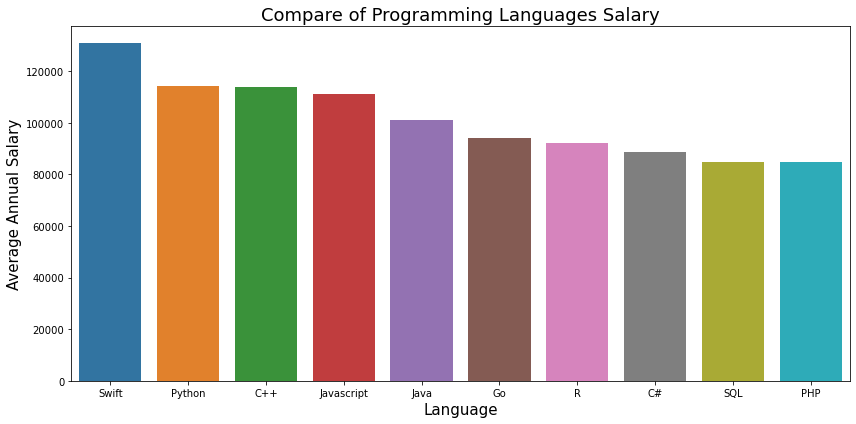

In [16]:
plt.figure(figsize=(12,6))

sns.barplot(x="Language", 
            y="Average Annual Salary", 
            data=popular_data, 
            order=popular_data.sort_values('Average Annual Salary',ascending = False)["Language"])
# set labels
plt.xlabel("Language", size=15)
plt.ylabel("Average Annual Salary", size=15)
plt.title("Compare of Programming Languages Salary", size=18)
plt.tight_layout()


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01).
